### Load Library

In [1]:
import pandas as pd # for data load 
import numpy as np # for linear algebra
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.cluster import DBSCAN, KMeans # Clustering Algorithms
from sklearn.preprocessing import StandardScaler # for scaling down the data

### Load Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
print(df.Species.unique())
print(df.Species.value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


In [6]:
# Encode the Species
df['Encoded_Species'],labels = df.Species.factorize()

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded_Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
labels

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

<b>1. Iris-setosa:0<br>
<b>2. Iris-versicolor:1<br>
<b>3. Iris-virginica:2<br>

In [9]:
df.drop('Species',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Encoded_Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Dependent and Indepent Features

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Encoded_Species'],
      dtype='object')

In [12]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Encoded_Species']

### Scaling

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [14]:
X_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Elbow Method

In [15]:
distortions = []
for i in range(1,8):
    model = KMeans(n_clusters=i)
    model.fit(X_scaled)
    distortions.append(model.inertia_)
print(distortions)

[600.0000000000003, 223.73200573676343, 141.15417813388655, 114.61550694959811, 91.1543680779766, 80.19300510158155, 70.91337109630959]


### Plotting Distortions

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

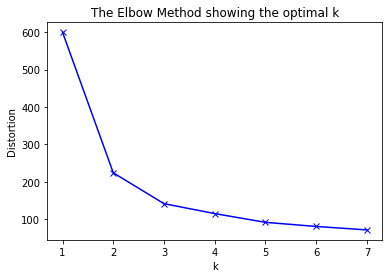

In [16]:
plt.plot(range(1,8), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

### Model Creation

In [17]:
model = KMeans(n_clusters=3)
model.fit(X_scaled)

KMeans(n_clusters=3)

### K-Means for n_clusters=3 vs Actual 

In [18]:
df['Prediction'] = model.predict(X_scaled)

Text(0, 0.5, 'SepalWidth')

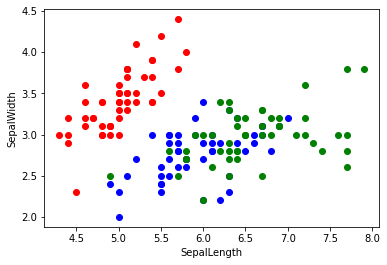

In [19]:
plt.scatter(df.loc[df.Encoded_Species==0,'SepalLengthCm'],df.loc[df.Encoded_Species==0,'SepalWidthCm'],c= 'red', label = 'Setosa')
plt.scatter(df.loc[df.Encoded_Species==1,'SepalLengthCm'],df.loc[df.Encoded_Species==1,'SepalWidthCm'],c= 'blue',label='Versicolour')
plt.scatter(df.loc[df.Encoded_Species==2,'SepalLengthCm'],df.loc[df.Encoded_Species==2,'SepalWidthCm'],c= 'green',label='Virginica')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

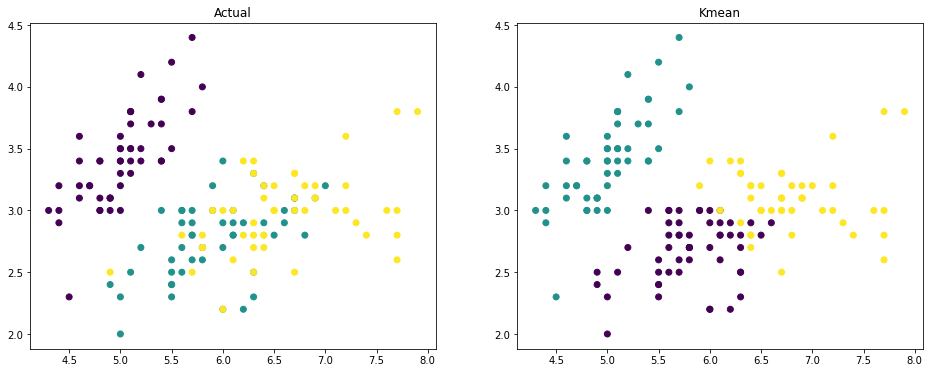

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,c=df.Encoded_Species)
plt.title('Actual')
plt.subplot(122)
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,c=df.Prediction)
plt.title('Kmean')
plt.show()

### SILHOUETTE ANALYSIS

In [53]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)
scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_scaled, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.580184463257396)
For n_clusters = 3, silhouette score is 0.46214947389312017)
For n_clusters = 4, silhouette score is 0.4055186142821238)
For n_clusters = 5, silhouette score is 0.3476748314279746)
For n_clusters = 6, silhouette score is 0.32062996892530693)
For n_clusters = 7, silhouette score is 0.3558298981336775)
For n_clusters = 8, silhouette score is 0.3505977903763071)
For n_clusters = 9, silhouette score is 0.3512862159222243)


Text(0.5, 1.0, 'The SILHOUETTE Method showing the optimal k')

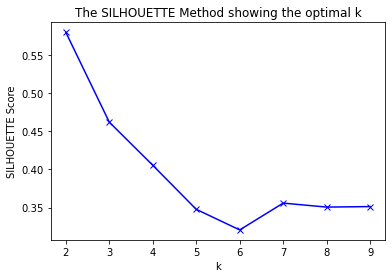

In [55]:
plt.plot(range(2,10), scores, 'bx-')
plt.xlabel('k')
plt.ylabel('SILHOUETTE Score')
plt.title('The SILHOUETTE Method showing the optimal k')

In [57]:
SILHOUETTE_model = KMeans(n_clusters=6)
df['SILHOUETTE_Pred'] = SILHOUETTE_model.fit_predict(X_scaled)

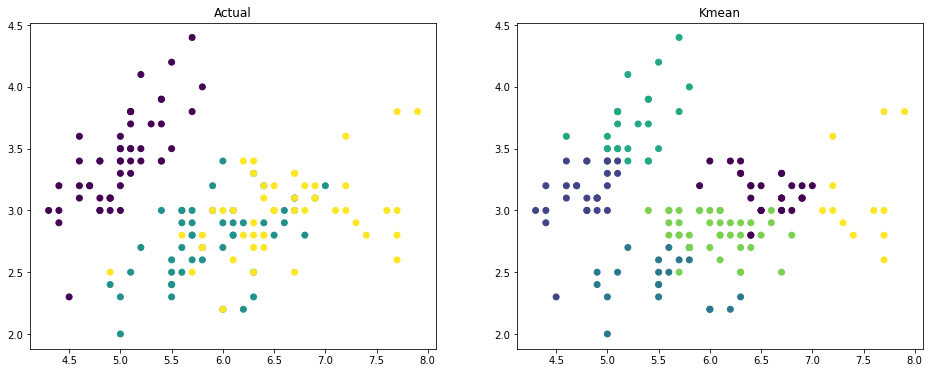

In [58]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,c=df.Encoded_Species)
plt.title('Actual')
plt.subplot(122)
plt.scatter(df.SepalLengthCm,df.SepalWidthCm,c=df.SILHOUETTE_Pred)
plt.title('Kmean')
plt.show()

###  hierarchical agglomerative clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

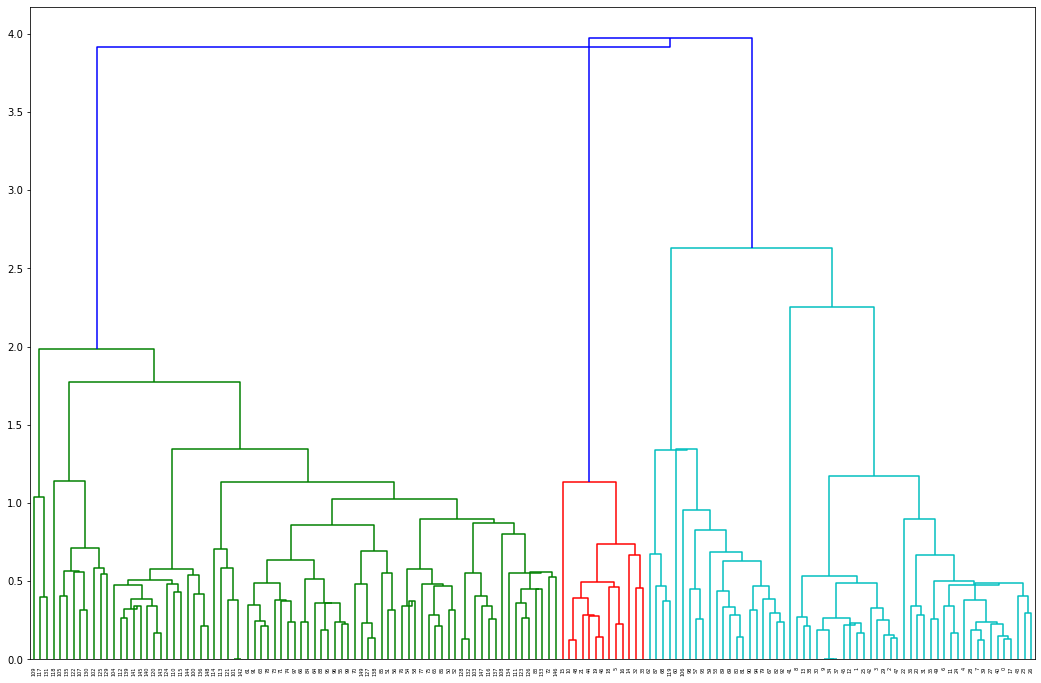

In [70]:
plt.figure(figsize=(18,12))
dendrogram = sch.dendrogram(sch.linkage(X_scaled,method="median"))

In [71]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X_scaled)
labels = model.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
model.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)